In [1]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [898]:
old_data = pd.read_csv('table51.csv', delimiter=';')
old_data.head()

,NaturalPersonID,RequestDate,ProductName,CreditSum,TypeOfWork,Employment,SignIP,sex,age,EducationStatus,...,kolichestvo_detej_mladshe_18,LivingRegionName,Residence,IncomeDocumentKind,HaveSalaryCard,IsBankWorker,TypeOfWork.1,SignIP.1,harakteristika_tekutschego_trudoustrojstva,ConfirmedMonthlyIncome (Target)
0,1ABD801A-0580-4C4F-9682-E7E85A749981,16.10.2018,Кредит на потребительские нужды,500000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Женский,49,Высшее образование,...,0,Самара,город,Выписка по счету,нет,да,NaN,NaN,Постоянная. полная занятость,30691.36
1,7B427911-9B96-443E-9EBA-76A02515E1BE,19.10.2018,Кредит на потребительские нужды,708000.0,NaN,Главный Специалист\Руководитель среднего звена,NaN,Женский,44,Среднее специальное образование,...,0,Казань,село,Выписка по счету,да,нет,NaN,NaN,Постоянная. полная занятость,25712.07
2,4B867BD5-6398-4400-99CA-CF208714AF9A,02.11.2018,Кредит на потребительские нужды,665000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,29,Высшее образование,...,1,Казань,город,Выписка по счету,да,нет,NaN,NaN,Постоянная. полная занятость,31081.26
3,ED654BFA-A7E7-4280-84CA-D6EAE80E45E2,02.11.2018,Кредит на потребительские нужды,458000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Женский,59,Несколько высших образований,...,0,Зеленодольский,село,2-НДФЛ,да,нет,NaN,NaN,Постоянная. полная занятость,17848.79
4,CCA3FF37-D508-449E-869A-6ED4CB6F9943,15.10.2018,Кредит на потребительские нужды,969000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,51,Высшее образование,...,2,Тюмень,город,2-НДФЛ,нет,нет,NaN,NaN,Постоянная. полная занятость,115380.53


table51.csv - начальные данные

ggg1.csv - данные, с которыми работает

gggSt.csv - стандартизируемые данные

In [2]:
#смотрим данные
cust_df = pd.read_csv('ggg1.csv', delimiter=';')
cust_df.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.0,49,1.25,0,30691.36
1,708000.0,44,20.00,0,25712.07
2,665000.0,29,2.00,1,31081.26
3,458000.0,59,23.00,0,17848.79
4,969000.0,51,9.25,2,115380.53


In [900]:
X = cust_df.values[:,0:]
X = np.nan_to_num(X)
X

array([[5.0000000e+05, 4.9000000e+01, 1.2500000e+00, 0.0000000e+00,
        3.0691360e+04],
       [7.0800000e+05, 4.4000000e+01, 2.0000000e+01, 0.0000000e+00,
        2.5712070e+04],
       [6.6500000e+05, 2.9000000e+01, 2.0000000e+00, 1.0000000e+00,
        3.1081260e+04],
       ...,
       [1.0500000e+05, 3.3000000e+01, 1.0000000e+01, 1.0000000e+00,
        7.1178740e+04],
       [4.0114669e+05, 3.9000000e+01, 7.9200000e+00, 1.0000000e+00,
        4.0104630e+04],
       [3.0945240e+05, 1.1000000e+01, 8.3300000e+00, 1.0000000e+00,
        2.7140120e+04]])

In [901]:
#K-Means
# предварительное центрирование данных
clusterNum = 6
k_means = KMeans(init="k-means++",n_clusters=clusterNum,n_init=60, precompute_distances=True, copy_x =True)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 5 5 ... 0 1 3]


In [902]:
#центры кластеров
k_means.cluster_centers_

array([[9.16121994e+04, 3.77017371e+01, 6.80222878e+00, 5.79154376e-01,
        3.19698292e+04],
       [5.02614984e+05, 4.00254777e+01, 8.91451623e+00, 6.29360024e-01,
        4.26214495e+04],
       [1.04861063e+06, 4.06611296e+01, 8.41099668e+00, 8.05647841e-01,
        6.43872135e+04],
       [2.78531763e+05, 3.79828252e+01, 7.20787892e+00, 5.66337484e-01,
        3.51683289e+04],
       [2.06941429e+06, 4.17466667e+01, 8.51826667e+00, 9.33333333e-01,
        1.00988806e+05],
       [7.31098012e+05, 4.06444059e+01, 9.19550737e+00, 6.83434519e-01,
        4.77547589e+04]])

In [903]:
#Сумма квадратов расстояний от образцов до ближайшего центра кластера
k_means.inertia_

64732764766670.61

In [904]:
#Количество выполненных итераций
k_means.n_iter_

17

In [905]:
#добавляем столбец, в котором будет написано к какому кластеру относится строка
cust_df.loc[:,'Clust_km'] = labels
cust_df.head(5)

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km
0,500000.0,49,1.25,0,30691.36,1
1,708000.0,44,20.00,0,25712.07,5
2,665000.0,29,2.00,1,31081.26,5
3,458000.0,59,23.00,0,17848.79,1
4,969000.0,51,9.25,2,115380.53,2


In [906]:
#смотрим среднее значение по каждому кластеру
cust_df.groupby('Clust_km').mean()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
Clust_km,,,,,
0,9.161220e+04,37.701737,6.802229,0.579154,31969.829233
1,5.025802e+05,40.025182,8.913580,0.629248,42624.040464
2,1.048611e+06,40.661130,8.410997,0.805648,64387.213472
3,2.785318e+05,37.982825,7.207879,0.566337,35168.328901
4,2.069414e+06,41.746667,8.518267,0.933333,100988.806000
5,7.309993e+05,40.644714,9.197938,0.683709,47742.910468


In [907]:
k1 = sum(cust_df['Clust_km']==0)
print('Количество строк, относящихся к 1 кластеру')
k1

Количество строк, относящихся к 1 кластеру


3051

In [908]:
k2 = sum(cust_df['Clust_km']==1)
print('Количество строк, относящихся ко 2 кластеру')
k2

Количество строк, относящихся ко 2 кластеру


3296

In [909]:
k3 = sum(cust_df['Clust_km']==2)
print('Количество строк, относящихся к 3 кластеру')
k3

Количество строк, относящихся к 3 кластеру


602

In [910]:
k4 = sum(cust_df['Clust_km']==3)
print('Количество строк, относящихся к 4 кластеру')
k4

Количество строк, относящихся к 4 кластеру


2329

In [911]:
k5 = sum(cust_df['Clust_km']==4)
print('Количество строк, относящихся к 5 кластеру')
k5

Количество строк, относящихся к 5 кластеру


75

In [912]:
k6 = sum(cust_df['Clust_km']==5)
print('Количество строк, относящихся к 6 кластеру')
k6

Количество строк, относящихся к 6 кластеру


1154

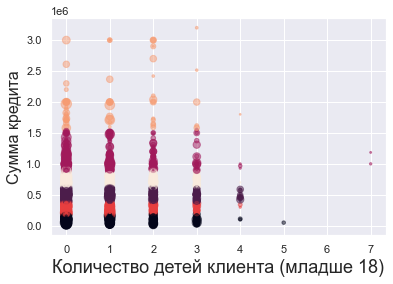

In [913]:
area = np.pi*(X[:,2])
plt.scatter(X[:,3],X[:,0],s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Количество детей клиента (младше 18)', fontsize=18)
plt.ylabel('Сумма кредита', fontsize=16)
plt.show()

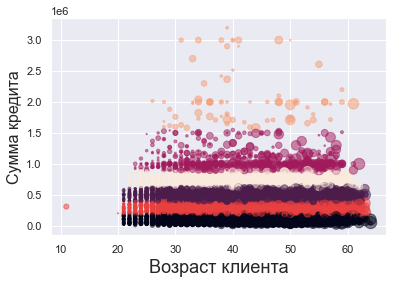

In [914]:
#хорошо видно различие кластеров благодаря цветам
area = np.pi*(X[:,2])
plt.scatter(X[:,1],X[:,0],s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Возраст клиента', fontsize=18)
plt.ylabel('Сумма кредита', fontsize=16)
plt.show()

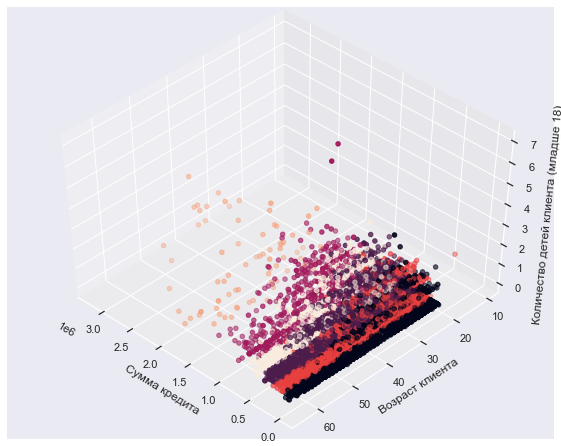

In [915]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0, .95,1], elev=48,azim=134)
ax.set_xlabel('Сумма кредита')
ax.set_ylabel('Возраст клиента')
ax.set_zlabel('Количество детей клиента (младше 18)')
ax.scatter(X[:,0],X[:,1], X[:,3], c=labels.astype(np.float))

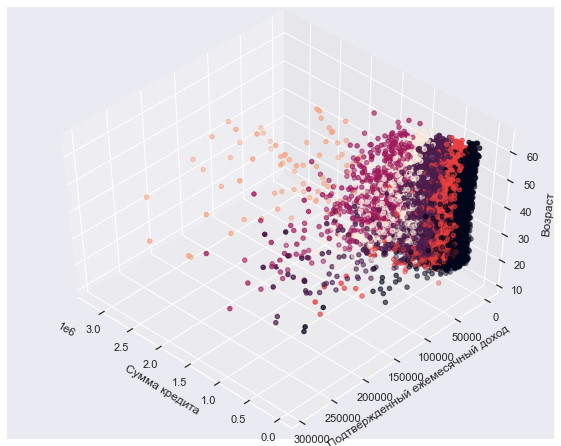

In [916]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0, .95,1], elev=48,azim=134)
ax.set_xlabel('Сумма кредита')
ax.set_ylabel('Подтвержденный ежемесячный доход')
ax.set_zlabel('Возраст')
ax.scatter(X[:,0],X[:,4],X[:,1], c=labels.astype(np.float))

In [917]:
#смотрим стандартизируемые данные
cust_df2 = pd.read_csv('gggSt.csv', delimiter=';')
cust_df2.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,0.31945,0.91363,-0.80124,-0.74595,-0.34684
1,0.99160,0.45602,1.45046,-0.74595,-0.53031
2,0.85265,-0.91678,-0.71117,0.45925,-0.33247
3,0.18372,1.82883,1.81073,-0.74595,-0.82003
4,1.83503,1.09667,0.15948,1.66445,2.77360


In [918]:
Z = cust_df2.values[:,0:]
Z = np.nan_to_num(Z)
Z

array([[ 0.31945,  0.91363, -0.80124, -0.74595, -0.34684],
       [ 0.9916 ,  0.45602,  1.45046, -0.74595, -0.53031],
       [ 0.85265, -0.91678, -0.71117,  0.45925, -0.33247],
       ...,
       [ 0.6426 , -0.45918,  0.12946,  0.45925,  0.91222],
       [-0.08045, -1.19134, -0.89131, -0.74595, -0.32344],
       [-0.957  , -0.5507 ,  0.24955,  0.45925,  1.14495]])

In [919]:
clusterNum = 6
k_means = KMeans(init="k-means++",n_clusters=clusterNum,n_init=60)
k_means.fit(Z)
labels = k_means.labels_
print(labels)

[1 3 4 ... 4 2 0]


In [920]:
cust_df2.loc[:,'Clust_km'] = labels
cust_df2.head(5)

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km
0,0.31945,0.91363,-0.80124,-0.74595,-0.34684,1
1,0.99160,0.45602,1.45046,-0.74595,-0.53031,3
2,0.85265,-0.91678,-0.71117,0.45925,-0.33247,4
3,0.18372,1.82883,1.81073,-0.74595,-0.82003,3
4,1.83503,1.09667,0.15948,1.66445,2.77360,5


In [921]:
#смотрим среднее значение по каждому кластеру
cust_df.groupby('Clust_km').mean()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
Clust_km,,,,,
0,9.161220e+04,37.701737,6.802229,0.579154,31969.829233
1,5.025802e+05,40.025182,8.913580,0.629248,42624.040464
2,1.048611e+06,40.661130,8.410997,0.805648,64387.213472
3,2.785318e+05,37.982825,7.207879,0.566337,35168.328901
4,2.069414e+06,41.746667,8.518267,0.933333,100988.806000
5,7.309993e+05,40.644714,9.197938,0.683709,47742.910468


In [922]:
k1 = sum(cust_df2['Clust_km']==0)
print('Количество строк, относящихся к 1 кластеру')
k1

Количество строк, относящихся к 1 кластеру


1631

In [923]:
k2 = sum(cust_df2['Clust_km']==1)
print('Количество строк, относящихся ко 2 кластеру')
k2

Количество строк, относящихся ко 2 кластеру


2424

In [924]:
k3 = sum(cust_df2['Clust_km']==2)
print('Количество строк, относящихся к 3 кластеру')
k3

Количество строк, относящихся к 3 кластеру


3314

In [925]:
k4 = sum(cust_df2['Clust_km']==3)
print('Количество строк, относящихся к 4 кластеру')
k4

Количество строк, относящихся к 4 кластеру


1327

In [926]:
k5 = sum(cust_df2['Clust_km']==4)
print('Количество строк, относящихся к 5 кластеру')
k5

Количество строк, относящихся к 5 кластеру


1526

In [927]:
k6 = sum(cust_df2['Clust_km']==5)
print('Количество строк, относящихся к 6 кластеру')
k6

Количество строк, относящихся к 6 кластеру


283

#эталоны кластеров

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


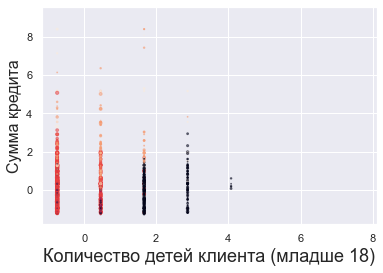

In [928]:
area = np.pi*(Z[:,2])
plt.scatter(Z[:,3],Z[:,0],s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Количество детей клиента (младше 18)', fontsize=18)
plt.ylabel('Сумма кредита', fontsize=16)
plt.show()

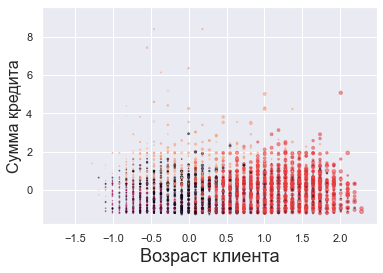

In [929]:
#хорошо видно различие кластеров благодаря цветам
area = np.pi*(Z[:,2])
plt.scatter(Z[:,1],Z[:,0],s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Возраст клиента', fontsize=18)
plt.ylabel('Сумма кредита', fontsize=16)
plt.show()

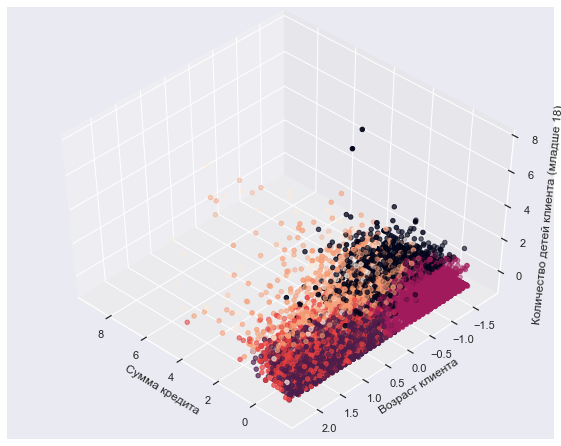

In [930]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0, .95,1], elev=48,azim=134)
ax.set_xlabel('Сумма кредита')
ax.set_ylabel('Возраст клиента')
ax.set_zlabel('Количество детей клиента (младше 18)')
ax.scatter(Z[:,0],Z[:,1], Z[:,3], c=labels.astype(np.float))

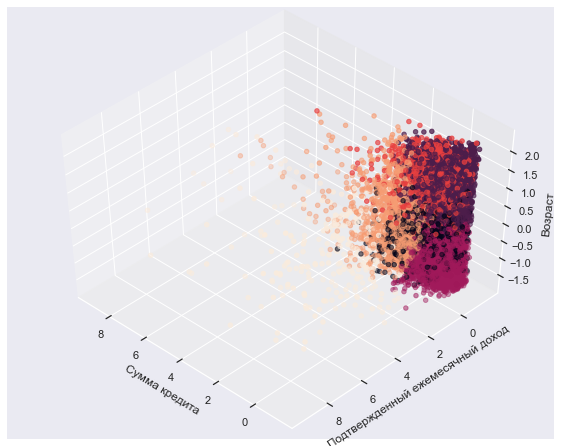

In [931]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0, .95,1], elev=48,azim=134)
ax.set_xlabel('Сумма кредита')
ax.set_ylabel('Подтвержденный ежемесячный доход')
ax.set_zlabel('Возраст')
ax.scatter(Z[:,0],Z[:,4],Z[:,1], c=labels.astype(np.float))

In [932]:
from sklearn.cluster import DBSCAN

In [933]:
Y = cust_df2.values[:,0:]
Y = np.nan_to_num(Y)
Y

array([[ 0.31945,  0.91363, -0.80124, -0.74595, -0.34684,  1.     ],
       [ 0.9916 ,  0.45602,  1.45046, -0.74595, -0.53031,  3.     ],
       [ 0.85265, -0.91678, -0.71117,  0.45925, -0.33247,  4.     ],
       ...,
       [ 0.6426 , -0.45918,  0.12946,  0.45925,  0.91222,  4.     ],
       [-0.08045, -1.19134, -0.89131, -0.74595, -0.32344,  2.     ],
       [-0.957  , -0.5507 ,  0.24955,  0.45925,  1.14495,  0.     ]])

In [934]:
#DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2).fit(Y)
print(dbscan)
labels2 =dbscan.labels_
print(labels2)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)
[0 0 0 ... 0 0 0]


In [935]:
#количесвто кластеров, на которое данные разбились
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
print('Расчетное количество кластеров: %d' % n_clusters_)

Расчетное количество кластеров: 2


In [936]:
cust_df2.loc[:,'Clust_dbscan'] = labels2
cust_df2.head(5)

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km,Clust_dbscan
0,0.31945,0.91363,-0.80124,-0.74595,-0.34684,1,0
1,0.99160,0.45602,1.45046,-0.74595,-0.53031,3,0
2,0.85265,-0.91678,-0.71117,0.45925,-0.33247,4,0
3,0.18372,1.82883,1.81073,-0.74595,-0.82003,3,0
4,1.83503,1.09667,0.15948,1.66445,2.77360,5,0


In [937]:
#смотрим среднее значение по кластерам
cust_df2.groupby('Clust_dbscan').mean()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km
Clust_dbscan,,,,,,
0,-0.000425,0.000096,0.000146,-0.001464,-0.000366,1.956774
1,2.233795,-0.504940,-0.766215,7.690450,1.919780,0.000000


In [938]:
d11 = sum(cust_df2['Clust_dbscan']==0)
print('Количество строк, относящихся к 1 кластеру')
d11

Количество строк, относящихся к 1 кластеру


10503

In [939]:
d11 = sum(cust_df2['Clust_dbscan']==1)
print('Количество строк, относящихся ко 2 кластеру')
d11

Количество строк, относящихся ко 2 кластеру


2

In [940]:
#DBSCAN
dbscan2 = DBSCAN(eps=3, min_samples=2).fit(X)
print(dbscan2)
labels3 =dbscan2.labels_
print(labels3)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)
[-1 -1 -1 ... -1 -1 -1]


In [941]:
#количесвто кластеров, на которое данные разбились
n_clusters_ = len(set(labels3)) - (1 if -1 in labels3 else 0)
print('Расчетное количество кластеров: %d' % n_clusters_)

Расчетное количество кластеров: 29


In [942]:
cust_df.loc[:,'Clust_dbscan'] = labels3
cust_df.head(5)

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km,Clust_dbscan
0,500000.0,49,1.25,0,30691.36,1,-1
1,708000.0,44,20.00,0,25712.07,5,-1
2,665000.0,29,2.00,1,31081.26,5,-1
3,458000.0,59,23.00,0,17848.79,1,-1
4,969000.0,51,9.25,2,115380.53,2,-1


In [943]:
cust_df.groupby('Clust_dbscan').mean()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km
Clust_dbscan,,,,,,
-1,400825.408568,39.026318,7.928658,0.617954,40105.645998,1.669729
0,326250.000000,49.000000,24.000000,0.000000,19092.420000,3.000000
1,100000.000000,22.000000,1.580000,0.000000,29686.005000,0.000000
2,603000.000000,38.000000,23.000000,2.000000,36614.530000,1.000000
3,31000.000000,44.000000,0.330000,1.000000,14949.230000,0.000000
4,300000.000000,37.000000,4.000000,2.000000,46952.200000,3.000000
5,725000.000000,45.000000,3.000000,1.000000,54122.000000,5.000000
6,500000.000000,38.500000,10.165000,1.500000,56550.000000,1.000000
7,700000.000000,24.000000,1.500000,1.000000,29037.850000,5.000000


In [944]:
d12 = sum(cust_df['Clust_dbscan']==-1)
print('Количество строк, относящихся к -1 кластеру')
d12

Количество строк, относящихся к -1 кластеру


10449

In [945]:
d22 = sum(cust_df['Clust_dbscan']==0)
print('Количество строк, относящихся к 1 кластеру')
d22

Количество строк, относящихся к 1 кластеру


2

In [946]:
d32 = sum(cust_df['Clust_dbscan']==20)
print('Количество строк, относящихся к 1 кластеру')
d32

Количество строк, относящихся к 1 кластеру


2

In [947]:
from sklearn.ensemble import RandomForestRegressor

In [948]:
cust_df.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km,Clust_dbscan
0,500000.0,49,1.25,0,30691.36,1,-1
1,708000.0,44,20.00,0,25712.07,5,-1
2,665000.0,29,2.00,1,31081.26,5,-1
3,458000.0,59,23.00,0,17848.79,1,-1
4,969000.0,51,9.25,2,115380.53,2,-1


In [949]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [950]:
# X_train, X_test, y_train, y_test = train_test_split(cust_df2.drop(['ConfirmedMonthlyIncome (Target)'],axis='columns'),cust_df2['ConfirmedMonthlyIncome (Target)'],test_size=1/4)
# X_train, X_test, y_train, y_test = train_test_split(cust_df2.drop([4],axis='columns'),cust_df2[4],test_size=1/4)

In [951]:
sc = StandardScaler()
scaled = sc.fit_transform(cust_df.values)
cust_df=pd.DataFrame(scaled)
x = cust_df[[i for i in cust_df.columns if i != 4]].values
y = cust_df[4].values

In [952]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/4)

In [953]:
clf = RandomForestRegressor(n_estimators=10)
clf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [954]:
clf.score(x, y, sample_weight=None)

0.19838103024046672

In [3]:
features = ['CreditSum', 'age', 'kolichestvo_detej_mladshe_18', 'OrgStanding_N', 'ConfirmedMonthlyIncome (Target)']
# sns.pairplot(cust_df[features])

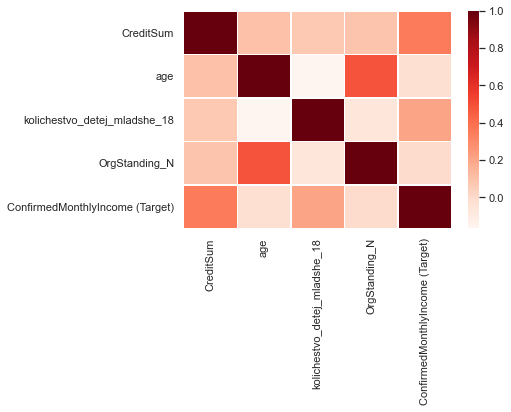

In [4]:
sns.heatmap(cust_df[features].corr(), linewidths=.5, cmap="Reds")

In [5]:
#сильной связи между признаками нет
cust_df.corr()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
CreditSum,1.000000,0.103620,0.091901,0.074598,0.355359
age,0.103620,1.000000,0.485558,-0.166799,-0.020511
OrgStanding_N,0.091901,0.485558,1.000000,-0.061127,-0.005681
kolichestvo_detej_mladshe_18,0.074598,-0.166799,-0.061127,1.000000,0.208038
ConfirmedMonthlyIncome (Target),0.355359,-0.020511,-0.005681,0.208038,1.000000


In [6]:
# cust_df['log_age'] = np.log1p(cust_df['age'])
# cust_df['log_kolichestvo_detej_mladshe_18'] = np.log1p(cust_df['kolichestvo_detej_mladshe_18'])

# fig, ax = plt.subplots(figsize = (15, 5))
# plt.subplot(1, 3, 1)
# plt.title('Распределение возраста клиента')
# sns.distplot(cust_df['log_age'], color='Green');
# plt.subplot(1, 3, 2)
# plt.title('Распределение количества детей (младше 18)')
# sns.distplot(cust_df['log_kolichestvo_detej_mladshe_18'], color='Orange');
# plt.subplot(1, 3, 3)
# plt.title('Зависимость кол-ва детей от возраста')
# plt.scatter(cust_df['log_kolichestvo_detej_mladshe_18'], cust_df['log_age'])

In [7]:
# sns.distplot(cust_df['CreditSum'])